In [1]:
#Project 1 --- Car_Price_Prediction

In [22]:
#1.Understanding the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [23]:
cars=pd.read_csv('C://Users//hp//Desktop//Henry Harvin//Assignment #6//CarPrice_Assignment.csv')

In [24]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [25]:
cars.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
cars.head(5).append(cars.tail(3))

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [27]:
cars.describe(percentiles=[0.25,0.5,0.75,1]).round(2)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
100%,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [28]:
cars.shape

(205, 26)

In [29]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [30]:
cars.index

RangeIndex(start=0, stop=205, step=1)

In [ ]:
2. Data Cleaning and Preparation 

In [31]:
#splitting the car name column and creating new columns  company and car model
cars=cars.join(cars['CarName'].str.split(' ',1,expand=True).rename(columns={0:'Company',1:'CarModel'}))
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,CarModel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [32]:
#checking the columns created
cars['Company'].unique()
cars['CarModel'].unique()

array(['giulia', 'stelvio', 'Quadrifoglio', '100 ls', '100ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'x5', 'impala', 'monte carlo', 'vega 2300', 'rampage',
       'challenger se', 'd200', 'monaco (sw)', 'colt hardtop',
       'colt (sw)', 'coronet custom', 'dart custom',
       'coronet custom (sw)', 'civic', 'civic cvcc', 'accord cvcc',
       'accord lx', 'civic 1500 gl', 'accord', 'civic 1300', 'prelude',
       'civic (auto)', 'MU-X', 'D-Max ', 'D-Max V-Cross', 'xj', 'xf',
       'xk', 'rx3', 'glc deluxe', 'rx2 coupe', 'rx-4', '626', 'glc',
       'rx-7 gs', 'glc 4', 'glc custom l', 'glc custom',
       'electra 225 custom', 'century luxus (sw)', 'century', 'skyhawk',
       'opel isuzu deluxe', 'skylark', 'century special',
       'regal sport coupe (turbo)', 'cougar', 'mirage', 'lancer',
       'outlander', 'g4', 'mirage g4', 'montero', 'pajero', 'versa',
       'gt-r', 'rogue', 'latio', 'titan', 'leaf', 'juke', 'note',
       'cli

In [33]:
#replacing incorrect values to correct values
cars['Company'].replace('maxda','mazda',inplace=True)
cars['Company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)
cars['Company'].replace('porcshce','porsche',inplace=True)
cars['Company'].replace('toyouta','toyota',inplace=True)

In [35]:
#converting all the string data to lower to avoid any case difference errors
cars['Company']=cars['Company'].str.lower()

In [36]:
#checking for duplicate values
cars.loc[cars.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,CarModel


In [37]:
#checking columns
column_names=cars.columns.tolist()
column_names

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'Company',
 'CarModel']

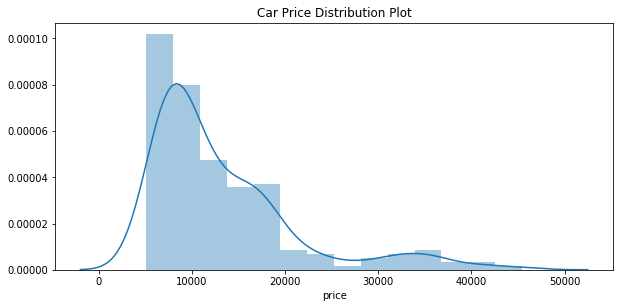

In [38]:
#3. Visualizing the Data

plt.figure(figsize=(10,10)) #plot size according to scale 1 unit=72 pixels
plt.subplot(2,1,1) #2 rows, 1 column and index=1
plt.title('Car Price Distribution Plot') #title for the chart 
sns.distplot(cars['price']) #distplot for price of cars

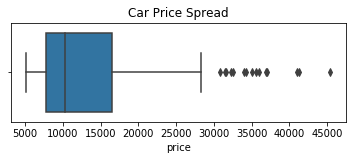

In [39]:
plt.subplot(2,1,2)
plt.title('Car Price Spread')
sns.boxplot(cars['price']) #distribution of price in the data
plt.show()

In [ ]:
"""
    Categorical Data 
    - Company               #
    - Symboling             #
    - fueltype              #
    - enginetype            #
    - carbody               #
    - doornumber            #
    - enginelocation        #
    - fuelsystem            #
    - cylindernumber        #
    - aspiration            #
    - drivewheel            #
"""

In [ ]:
#1. Car Company

([<matplotlib.axis.XTick at 0x19e2abc5a58>,
 <a list of 22 Text xticklabel objects>)

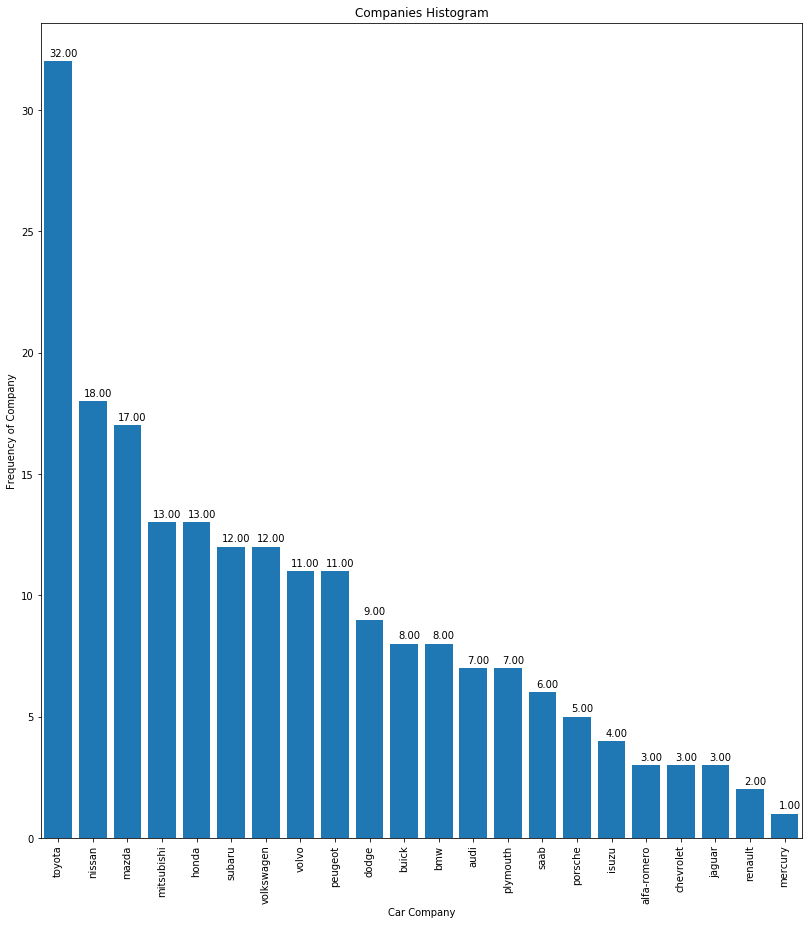

In [40]:
plt.figure(figsize=(30, 15))

#plot 1
plt.subplot(1,2,1)
plt1 = cars['Company'].value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car Company', ylabel='Frequency of Company')
xs=cars['Company'].unique()
ys=cars['Company'].value_counts()
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points",xytext=(5,5),ha='center') 
plt.xticks(xs)

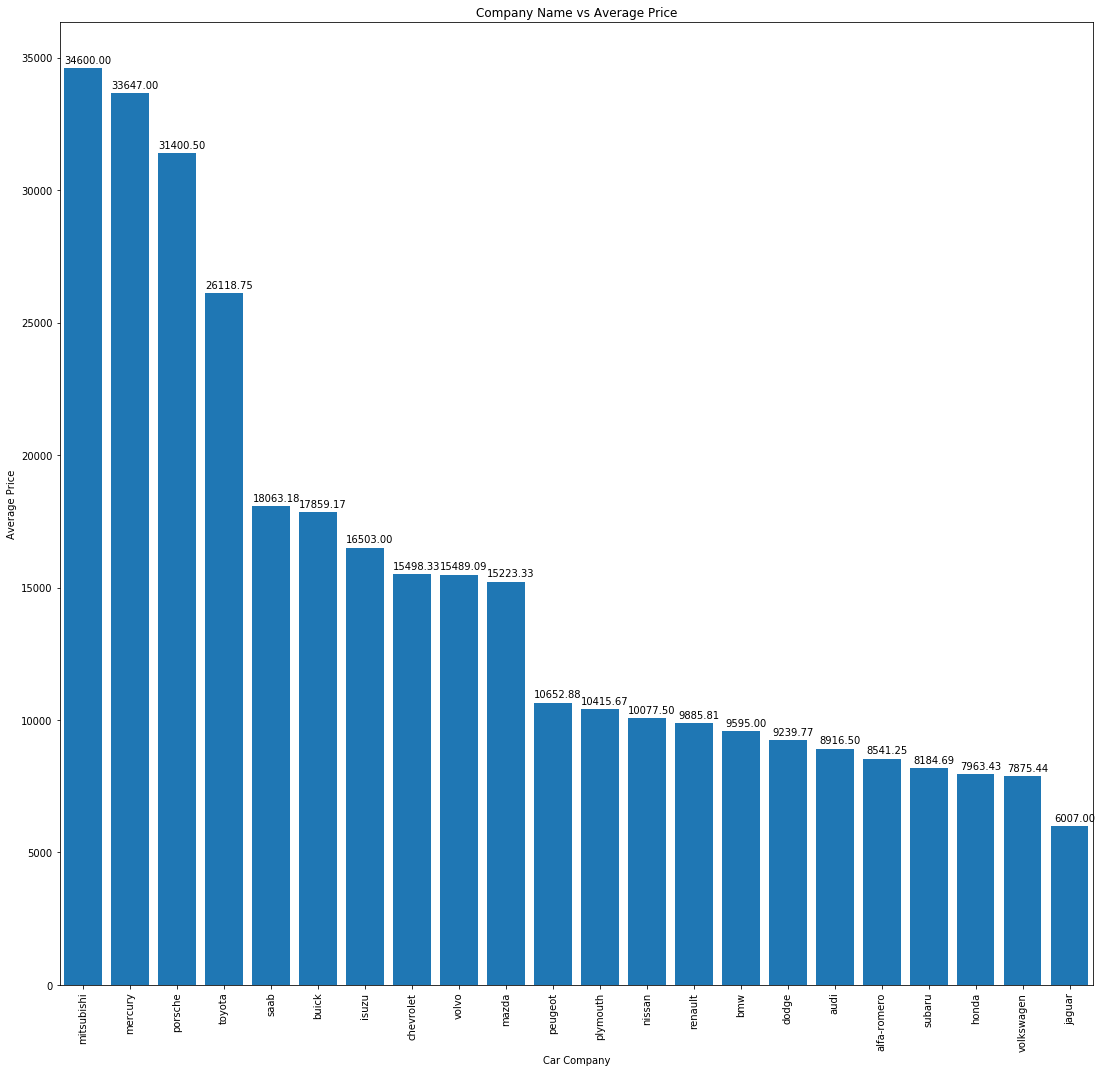

In [41]:
plt.figure(figsize=(30, 15))

#plot 2
plt.subplot(1,2,2)
company_vs_price = pd.DataFrame(cars.groupby(['Company'])['price'].mean().sort_values(ascending = False))
plt2=company_vs_price.index.value_counts().plot('bar')
plt.title('Company Name vs Average Price')
plt2.set(xlabel='Car Company', ylabel='Average Price')
xs=company_vs_price.index
ys=company_vs_price['price'].round(2)
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points",xytext=(5,5),ha='center') 
plt.xticks(xs)
plt.tight_layout()
plt.show()

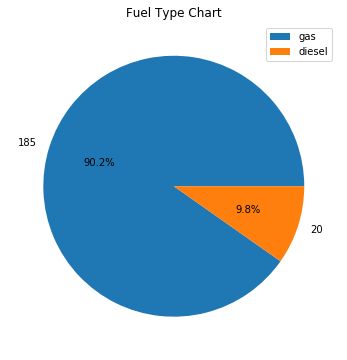

In [42]:
#2. Fuel Type

plt.figure(figsize=(25, 6))

#plot 1
plt.subplot(1,2,1)
plt.title('Fuel Type Chart')
labels=cars['fueltype'].unique()
plt3 = cars['fueltype'].value_counts().tolist()
plt.pie(plt3,labels=plt3, autopct='%1.1f%%')
plt.legend(labels)

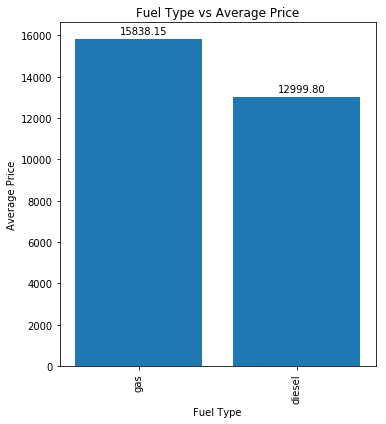

In [43]:
plt.figure(figsize=(10, 6))

#plot 2
plt.subplot(1,2,2)
fuel_vs_price = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
plt4=fuel_vs_price.index.value_counts().plot('bar')
plt.title('Fuel Type vs Average Price')
plt4.set(xlabel='Fuel Type', ylabel='Average Price')
xs=fuel_vs_price.index
ys=fuel_vs_price['price'].round(2)
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points",xytext=(5,5),ha='center') 
plt.xticks(xs)
plt.tight_layout()
plt.show()

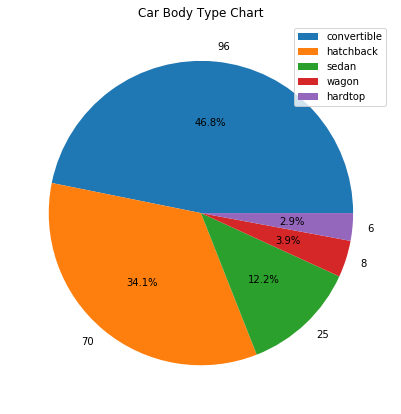

In [44]:
#3. Car Body Type

plt.figure(figsize=(15,10))

#plot 1
plt.subplot(1,2,1)
plt.title('Car Body Type Chart')
labels=cars['carbody'].unique()
plt5 = cars['carbody'].value_counts().tolist()
plt.pie(plt5, labels=plt5, autopct='%1.1f%%')
plt.legend(labels, loc=1)

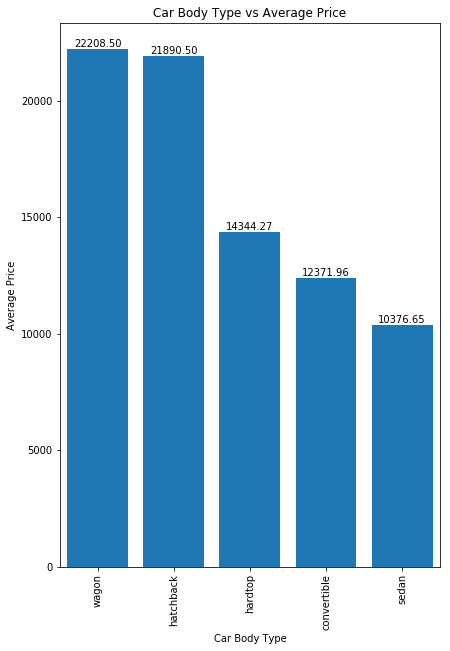

In [45]:
plt.figure(figsize=(15,10))

#plot 2
plt.subplot(1,2,2)
car_vs_price = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
plt6=car_vs_price.index.value_counts().plot('bar')
plt.title('Car Body Type vs Average Price')
plt6.set(xlabel='Car Body Type', ylabel='Average Price')
xs=car_vs_price.index
ys=car_vs_price['price'].round(2)
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points",xytext=(0,2),ha='center') 
plt.xticks(xs)
plt.show()

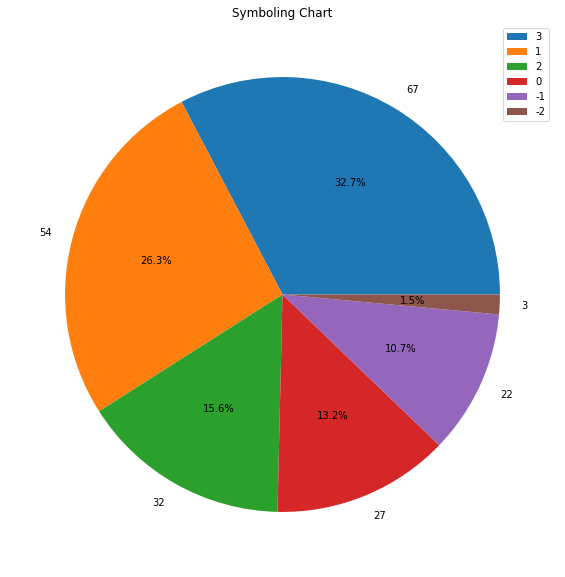

In [46]:
#4. Symboling

plt.figure(figsize=(25,10))

#plot 1
plt.subplot(1,2,1)
plt.title('Symboling Chart')
labels=cars['symboling'].unique()
plt7 = cars['symboling'].value_counts().tolist()
plt.pie(plt7, labels=plt7, autopct='%1.1f%%')
plt.legend(labels, loc=1)

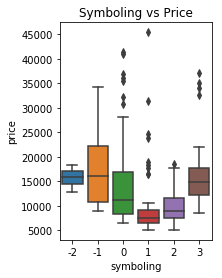

In [47]:
#plot 2
plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars['symboling'], y=cars['price'])
plt.show()

([<matplotlib.axis.XTick at 0x19e2b1d3278>,
 <a list of 7 Text xticklabel objects>)

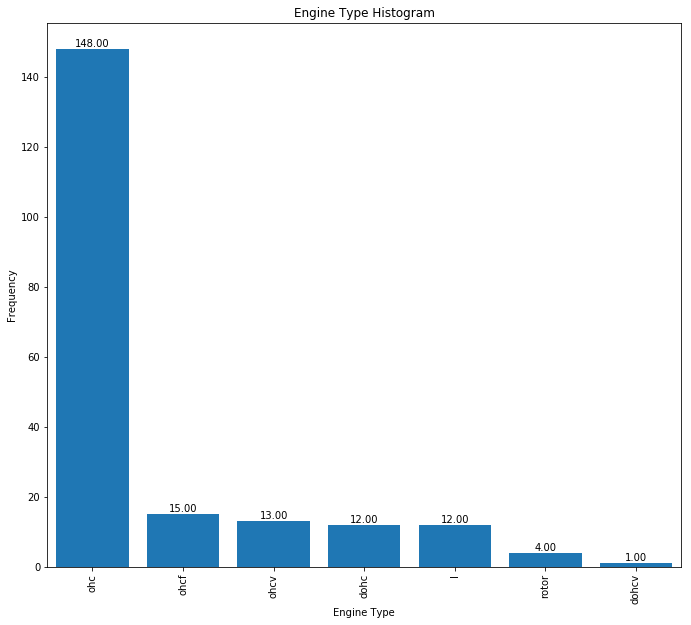

In [48]:
#5. Engine Type

plt.figure(figsize=(25,10))

#plot 1
plt.subplot(1,2,1)
plt8 = cars['enginetype'].value_counts().plot('bar')
plt.title('Engine Type Histogram')
plt8.set(xlabel = 'Engine Type', ylabel='Frequency')
xs=cars['enginetype'].unique()
ys=cars['enginetype'].value_counts()
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points",xytext=(0,2),ha='center') 
plt.xticks(xs)

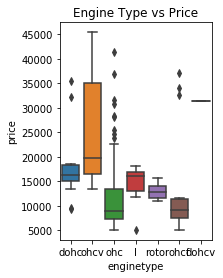

In [49]:
#plot 2
plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars['enginetype'], y=cars['price'])
plt.show()

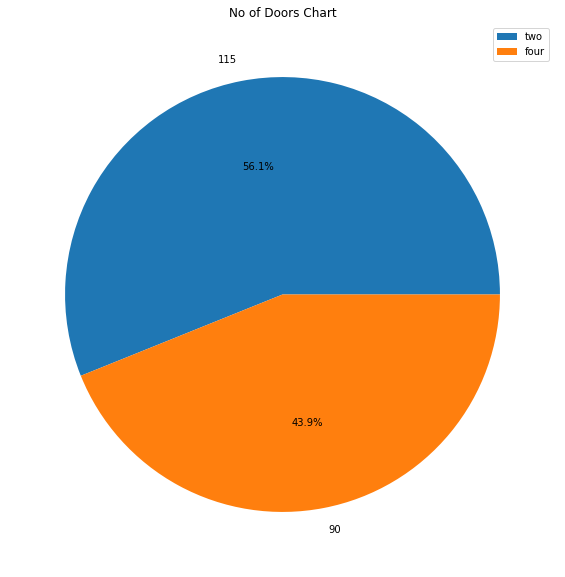

In [50]:
#6. Door Number 
 
plt.figure(figsize=(25,10))

#plot 1
plt.subplot(1,2,1)
labels=cars['doornumber'].unique()
plt8 = cars['doornumber'].value_counts().tolist()
plt.title('No of Doors Chart')
plt.pie(plt8, labels=plt8, autopct='%1.1f%%')
plt.legend(labels, loc=1)

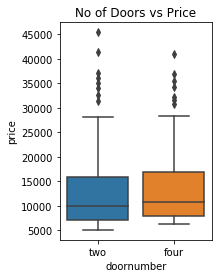

In [51]:
#plot 2
plt.subplot(1,2,2)
plt.title('No of Doors vs Price')
sns.boxplot(x=cars['doornumber'], y=cars['price'])
plt.show()

([<matplotlib.axis.XTick at 0x19e2b6aeef0>,
 <a list of 8 Text xticklabel objects>)

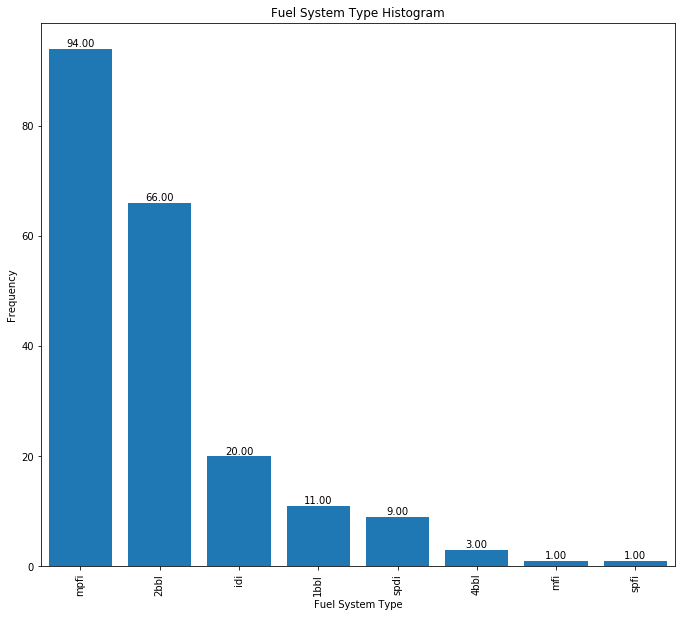

In [52]:
#7. Fuel System

plt.figure(figsize=(25,10))

#plot 1
plt.subplot(1,2,1)
plt10 = cars['fuelsystem'].value_counts().plot('bar')
plt.title('Fuel System Type Histogram')
plt10.set(xlabel = 'Fuel System Type', ylabel='Frequency')
xs=cars['fuelsystem'].unique()
ys=cars['fuelsystem'].value_counts()
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points",xytext=(0,2),ha='center') 
plt.xticks(xs)

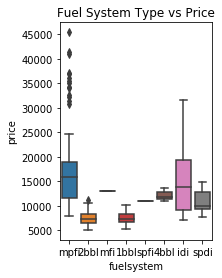

In [53]:
#plot 2
plt.subplot(1,2,2)
plt.title('Fuel System Type vs Price')
sns.boxplot(x=cars['fuelsystem'], y=cars['price'])
plt.show()

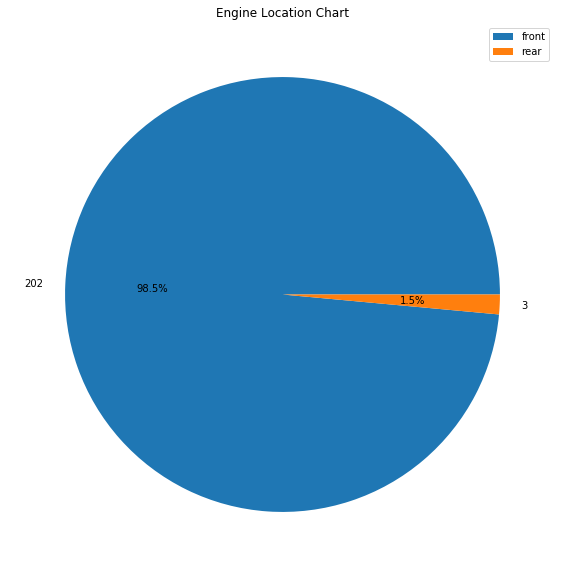

In [54]:
#8. Engine Location

plt.figure(figsize=(25,10))

#plot 1
plt.subplot(1,2,1)
labels=cars['enginelocation'].unique()
plt9 = cars['enginelocation'].value_counts().tolist()
plt.title('Engine Location Chart')
plt.pie(plt9, labels=plt9, autopct='%1.1f%%')
plt.legend(labels, loc=1)

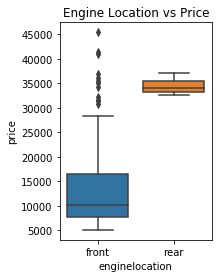

In [55]:
#plot 2
plt.subplot(1,2,2)
plt.title('Engine Location vs Price')
sns.boxplot(x=cars['enginelocation'], y=cars['price'])
plt.show()

([<matplotlib.axis.XTick at 0x19e2b2a9e48>,
 <a list of 7 Text xticklabel objects>)

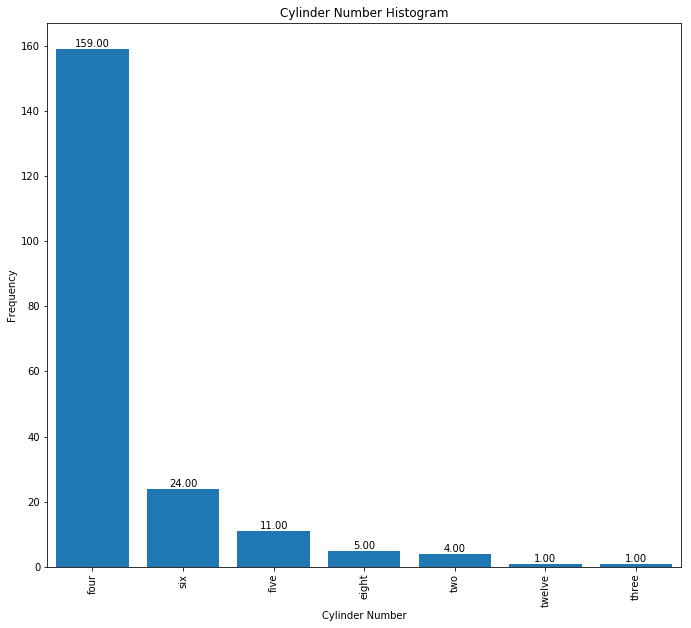

In [56]:
#9. Cylinder Number '

plt.figure(figsize=(25,10))

#plot 1
plt.subplot(1,2,1)
plt11 = cars['cylindernumber'].value_counts().plot('bar')
plt.title('Cylinder Number Histogram')
plt11.set(xlabel = 'Cylinder Number', ylabel='Frequency')
xs=cars['cylindernumber'].unique()
ys=cars['cylindernumber'].value_counts()
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points",xytext=(0,2),ha='center') 
plt.xticks(xs)

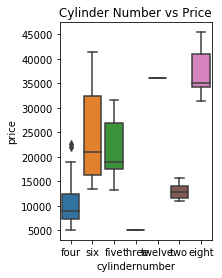

In [57]:
#plot 2
plt.subplot(1,2,2)
plt.title('Cylinder Number vs Price')
sns.boxplot(x=cars['cylindernumber'], y=cars['price'])
plt.show()

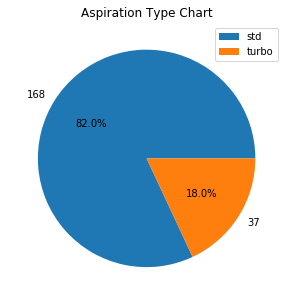

In [58]:
#10. Aspiration

plt.figure(figsize=(15,5))

#plot 1
plt.subplot(1,2,1)
labels=cars['aspiration'].unique()
plt12 = cars['aspiration'].value_counts().tolist()
plt.title('Aspiration Type Chart')
plt.pie(plt12, labels=plt12, autopct='%1.1f%%')
plt.legend(labels, loc=1)

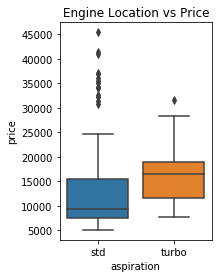

In [59]:
#plot 2
plt.subplot(1,2,2)
plt.title('Engine Location vs Price')
sns.boxplot(x=cars['aspiration'], y=cars['price'])
plt.show()

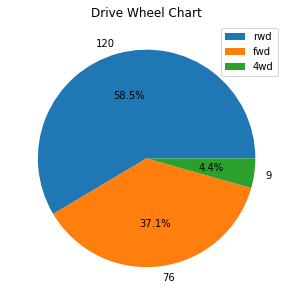

In [60]:
#11. Drivewheel

plt.figure(figsize=(15,5))

#plot 1
plt.subplot(1,2,1)
labels=cars['drivewheel'].unique()
plt13 = cars['drivewheel'].value_counts().tolist()
plt.title('Drive Wheel Chart')
plt.pie(plt13, labels=plt13, autopct='%1.1f%%')
plt.legend(labels, loc=1)

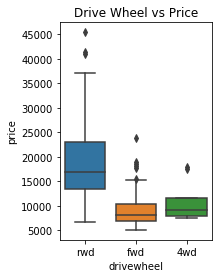

In [61]:
#plot 2
plt.subplot(1,2,2)
plt.title('Drive Wheel vs Price')
sns.boxplot(x=cars['drivewheel'], y=cars['price'])
plt.show()

In [ ]:
"""
Numerical Variables 
-Car Length                             #
-Car Width                              #
-Car Height                             #
-Curb Weight                            #
-Horsepower                             #
-Bore Ratio                             #
-Compression Ratio                      #
-Highway miles per gallon (mpg)         #        
-Engine Size                            #                  
-Stroke                                 #
-City Miles per gallon (mpg)            #
-Peak Revolutions per Minute (rpm)      #
-Wheel Base                             #
 
"""

In [62]:
def scatterplot(df,var):
    
    plt.scatter(df[var],df['price'])
    plt.xlabel(var); plt.ylabel('Price')
    plt.title('Scatter Plot for '+var+' vs Price')

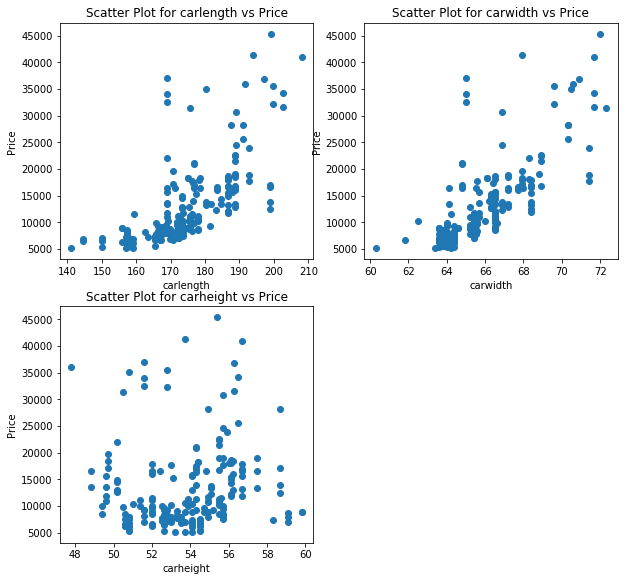

<Figure size 432x288 with 0 Axes>

In [63]:
#1. Car Length, Width and Height

plt.figure(figsize=(10,20))
plt.subplot(4,2,1)
scatterplot(cars,'carlength')    
plt.subplot(4,2,2)
scatterplot(cars,'carwidth')
plt.subplot(4,2,3)
scatterplot(cars,'carheight')
plt.show()
plt.tight_layout()

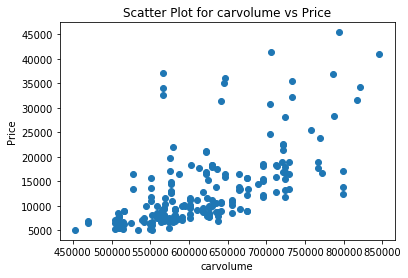

In [64]:
#2. Creating a new variable- Car Volume

cars['carvolume']=cars['carlength']*cars['carwidth']*cars['carheight']    
cars['carvolume'].unique()
scatterplot(cars,'carvolume')

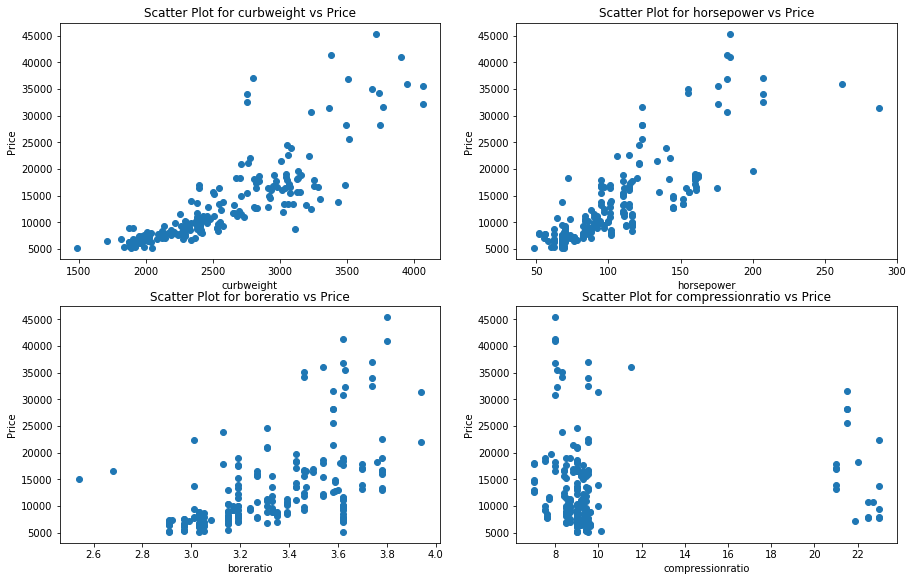

<Figure size 432x288 with 0 Axes>

In [65]:
#3. Curb Weight (Effective Weight of Car including its internal components), HorsePower, Boreratio, and Compression Ratio
    
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
scatterplot(cars,'curbweight')    
plt.subplot(4,2,2)
scatterplot(cars,'horsepower')
plt.subplot(4,2,3)
scatterplot(cars,'boreratio')
plt.subplot(4,2,4)
scatterplot(cars,'compressionratio')
plt.show()
plt.tight_layout()

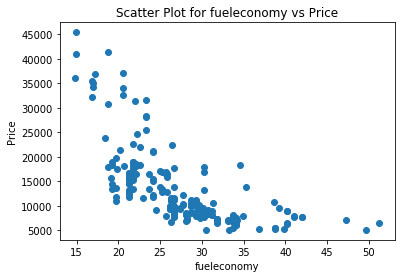

In [66]:
#4. Creating a new Variable - Fuel Economy

cars['fueleconomy']=(cars['citympg']*0.55)+(cars['highwaympg']*0.45)      
cars['fueleconomy'].unique()
scatterplot(cars,'fueleconomy')

In [67]:
#5. Creating a Categorical Variable - Car Class
    
carsrange=[]
for i in cars['price']:
    if (i>0 and i<9000): carsrange.append('Low')
    elif (i>9000 and i<18000): carsrange.append('Medium-Low')
    elif (i>18000 and i<27000): carsrange.append('Medium')
    elif(i>27000 and i<36000): carsrange.append('High-Medium')
    else : carsrange.append('High')
cars['carsrange']=carsrange
cars['carsrange'].unique()

array(['Medium-Low', 'Medium', 'High-Medium', 'High', 'Low'], dtype=object)

([<matplotlib.axis.XTick at 0x19e2c347b38>,
 <a list of 5 Text xticklabel objects>)

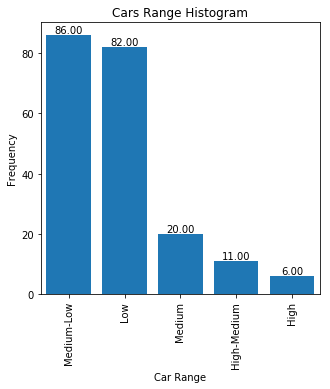

In [68]:
#plot
plt.figure(figsize=(5,5))
plt14 = cars['carsrange'].value_counts().plot('bar')
plt.title('Cars Range Histogram')
plt14.set(xlabel = 'Car Range', ylabel='Frequency')
xs=cars['carsrange'].unique()
ys=cars['carsrange'].value_counts()
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points",xytext=(0,2),ha='center') 
plt.xticks(xs)

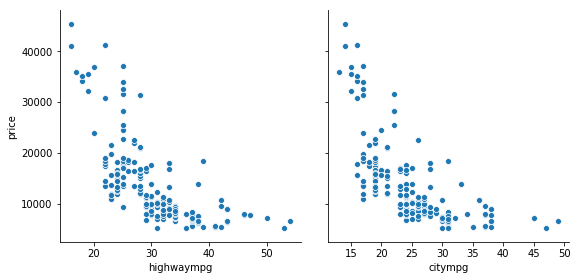

In [69]:
#6. Highway mpg and City mpg 
sns.pairplot(cars, x_vars=['highwaympg','citympg'], y_vars='price', height=4, aspect=1, kind='scatter')   

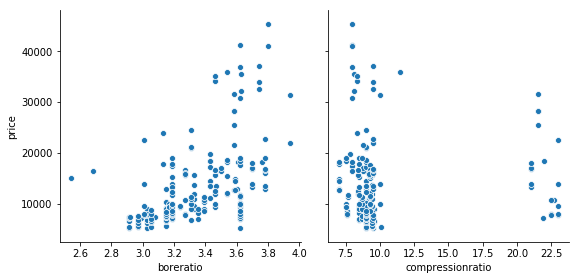

In [70]:
#7. Bore Ratio and Compression Ratio
sns.pairplot(cars, x_vars=['boreratio','compressionratio'], y_vars='price', height=4, aspect=1, kind='scatter')   

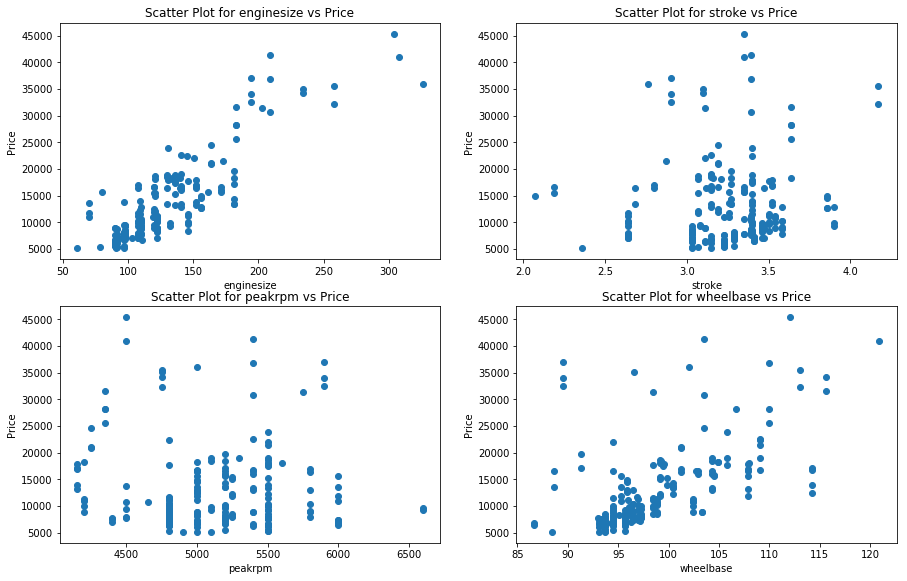

<Figure size 432x288 with 0 Axes>

In [71]:
#8. Engine Size, Stroke, RPM and Wheelbase

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
scatterplot(cars,'enginesize')    
plt.subplot(4,2,2)
scatterplot(cars,'stroke')
plt.subplot(4,2,3)
scatterplot(cars,'peakrpm')
plt.subplot(4,2,4)
scatterplot(cars,'wheelbase')
plt.show()
plt.tight_layout()    

In [132]:
#Correlation with price(target variable) for numeric data
    
corr=cars.corr().round(3).loc['price']
corr=pd.DataFrame(corr)
corr
result=[]

In [133]:
for i in corr['price']:
    if (i>-1 and i<-0.4): result.append('strong negative')
    elif (i>-0.4 and i<-0.2): result.append('moderate negative')
    elif (i>-0.2 and i<0): result.append('weak negative')
    elif(i>0 and i<0.2): result.append('weak positive')
    elif(i>0.2 and i<0.5): result.append('moderate positive')
    else : result.append('strong positive')

In [134]:
corr['correlation']=result

In [135]:
corr['correlation'].value_counts()

strong positive    9
weak positive      3
strong negative    3
weak negative      3
Name: correlation, dtype: int64

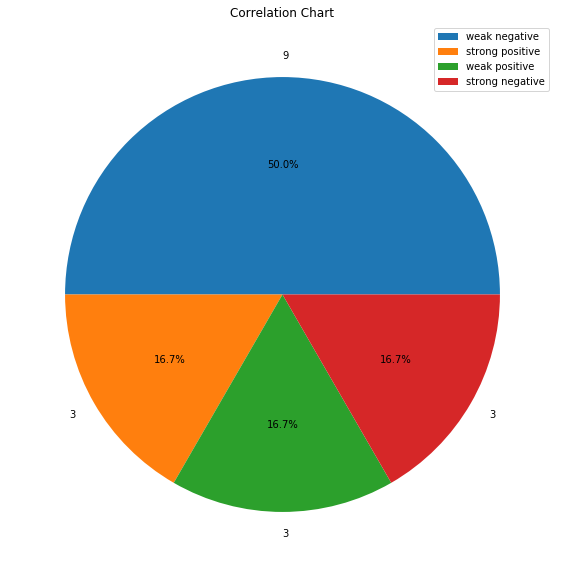

In [136]:
plt.figure(figsize=(10,10))
plt.title('Correlation Chart')
labels=corr['correlation'].unique()
plt15 = corr['correlation'].value_counts().tolist()
plt.pie(plt15, labels=plt15, autopct='%1.1f%%')
plt.legend(labels, loc=1)

In [137]:
corr.loc[:,'correlation']

car_ID                weak negative
symboling             weak negative
wheelbase           strong positive
carlength           strong positive
carwidth            strong positive
carheight             weak positive
curbweight          strong positive
enginesize          strong positive
boreratio           strong positive
stroke                weak positive
compressionratio      weak positive
horsepower          strong positive
peakrpm               weak negative
citympg             strong negative
highwaympg          strong negative
price               strong positive
carvolume           strong positive
fueleconomy         strong negative
Name: correlation, dtype: object

In [ ]:
"""
Variables to be taken for analysis (Based on Visualization) :
    
- Car Range
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number
- Car Length
- Car Width 
- Drivewheel 
- Curbweight 
- Car Volume
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy
"""

In [138]:
#Regression

cars_data=cars[['price','carsrange','enginetype','fueltype','carbody','aspiration','cylindernumber','carlength','carwidth','drivewheel','curbweight','carvolume','enginesize','boreratio','horsepower','wheelbase','fueleconomy']]

In [139]:
cars_data.head(5)

,price,carsrange,enginetype,fueltype,carbody,aspiration,cylindernumber,carlength,carwidth,drivewheel,curbweight,carvolume,enginesize,boreratio,horsepower,wheelbase,fueleconomy
0,13495.0,Medium-Low,dohc,gas,convertible,std,four,168.8,64.1,rwd,2548,528019.904,130,3.47,111,88.6,23.70
1,16500.0,Medium-Low,dohc,gas,convertible,std,four,168.8,64.1,rwd,2548,528019.904,130,3.47,111,88.6,23.70
2,16500.0,Medium-Low,ohcv,gas,hatchback,std,six,171.2,65.5,rwd,2823,587592.640,152,2.68,154,94.5,22.15
3,13950.0,Medium-Low,ohc,gas,sedan,std,four,176.6,66.2,fwd,2337,634816.956,109,3.19,102,99.8,26.70
4,17450.0,Medium-Low,ohc,gas,sedan,std,five,176.6,66.4,4wd,2824,636734.832,136,3.19,115,99.4,19.80


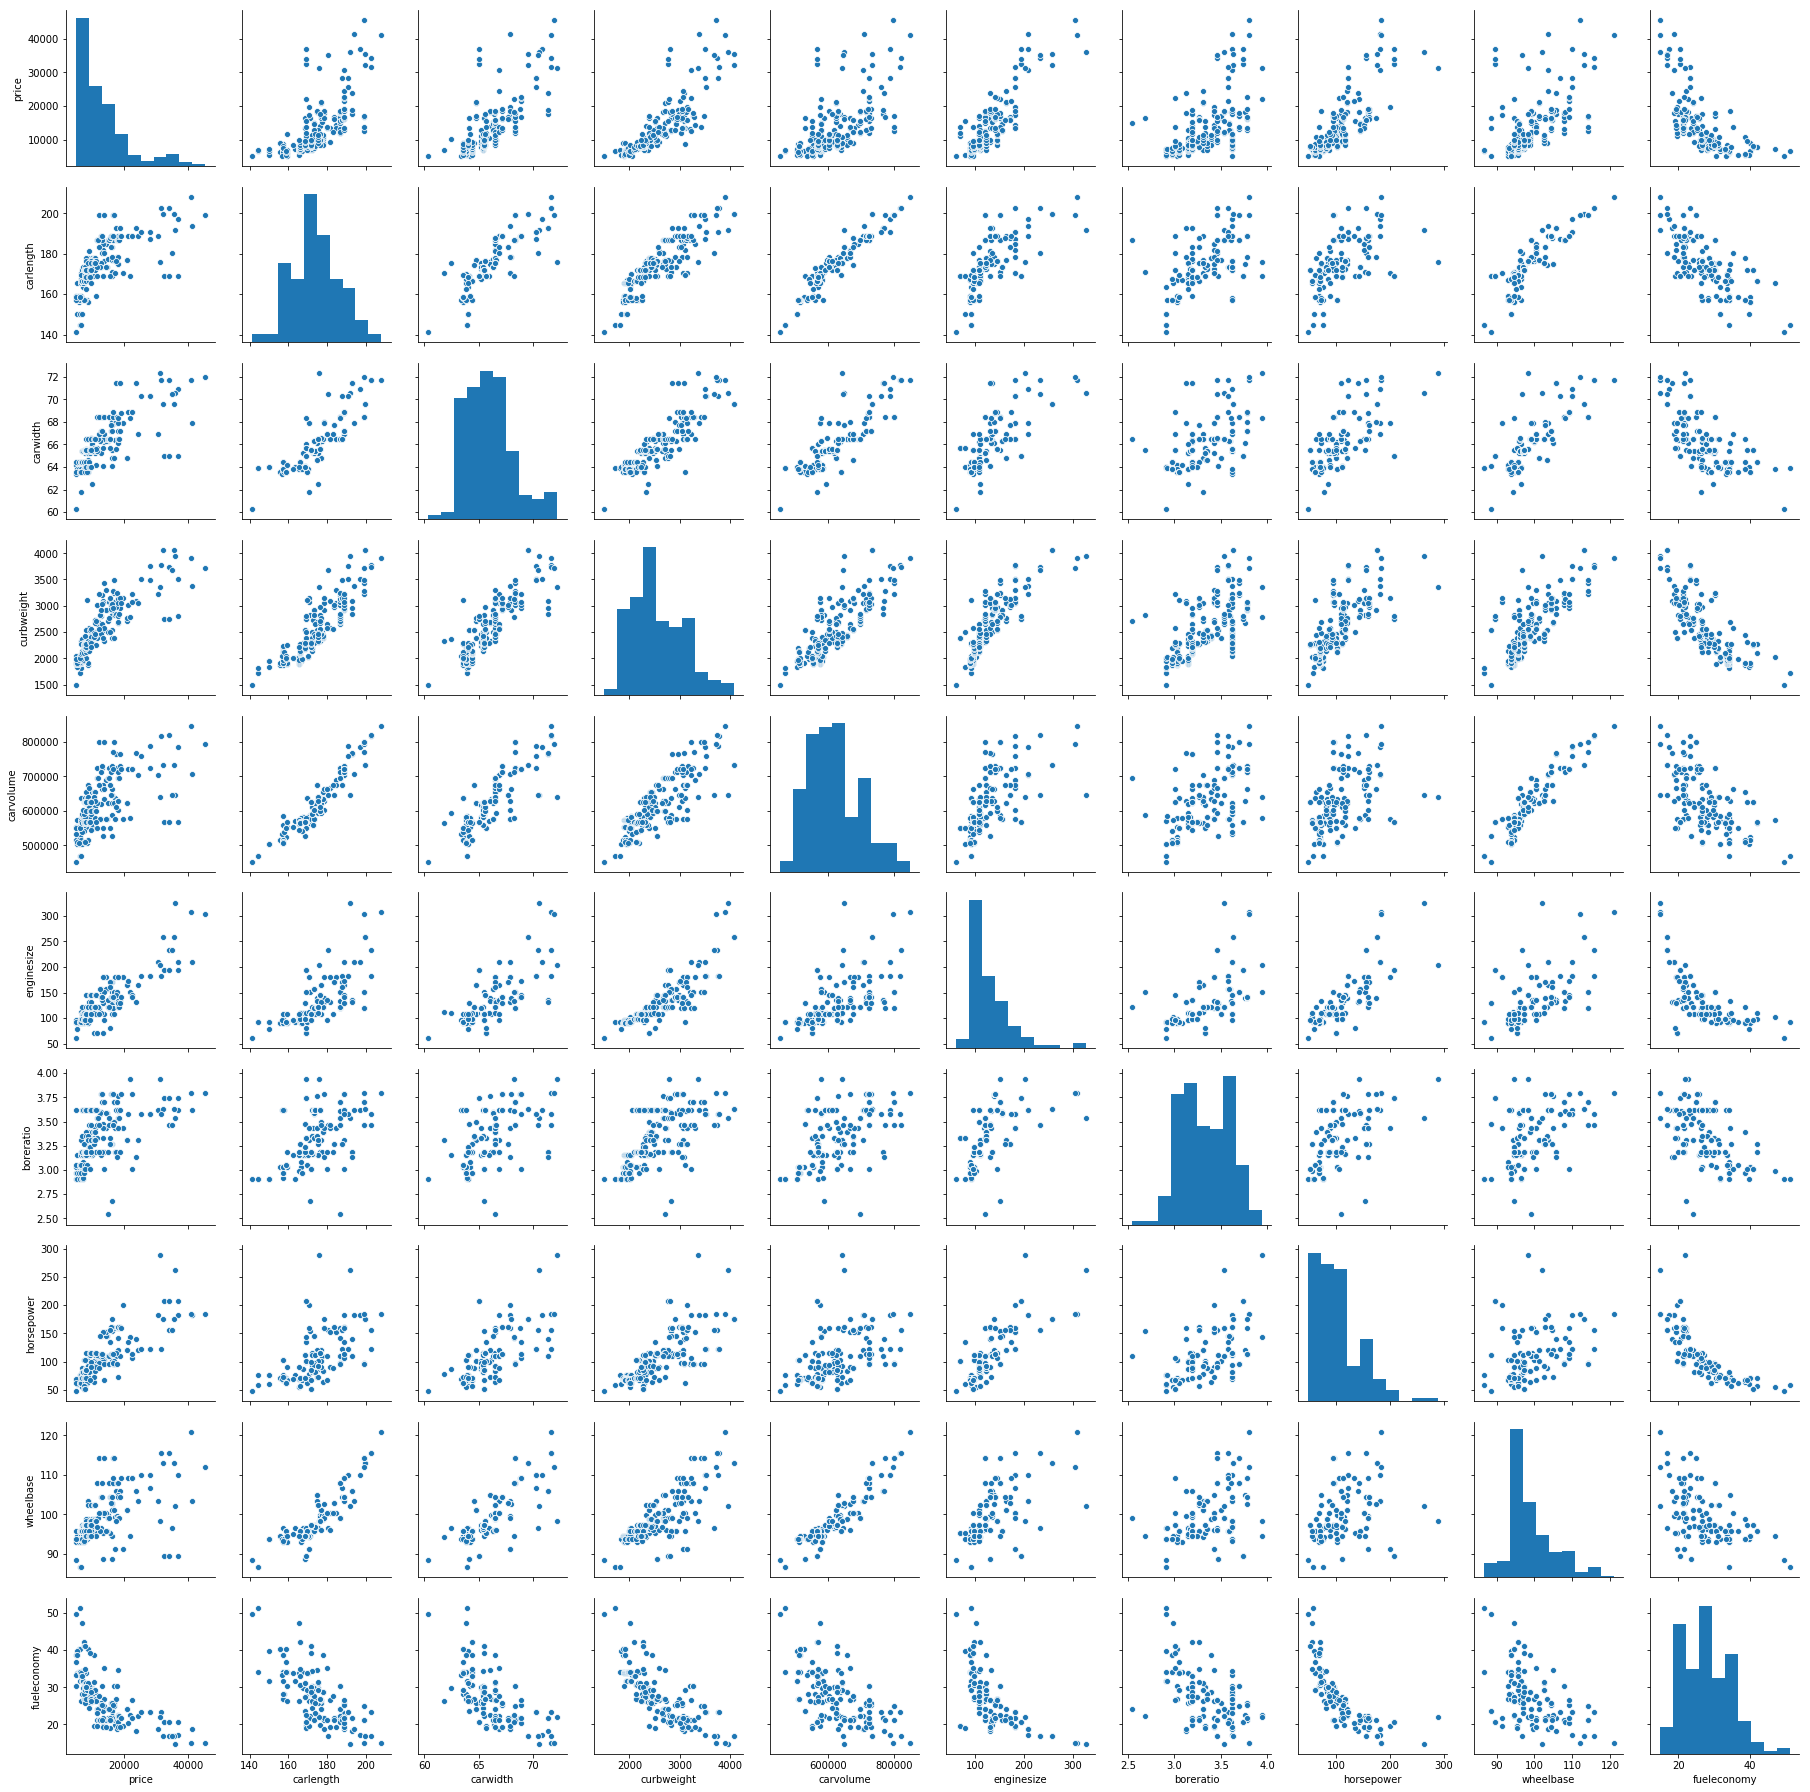

In [140]:
sns.pairplot(cars_data)
plt.show()

In [141]:
#Dummy Variables

def dummies(x,df):
    var=pd.get_dummies(df[x], drop_first=True)
    df=pd.concat([df,var], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df

In [142]:
cars_data = dummies('fueltype',cars_data)
cars_data = dummies('aspiration',cars_data)
cars_data = dummies('carbody',cars_data)
cars_data = dummies('drivewheel',cars_data)
cars_data = dummies('enginetype',cars_data)
cars_data = dummies('cylindernumber',cars_data)
cars_data = dummies('carsrange',cars_data)

In [143]:
cars_data.head()

,price,carlength,carwidth,curbweight,carvolume,enginesize,boreratio,horsepower,wheelbase,fueleconomy,...,five,four,six,three,twelve,two,High-Medium,Low,Medium,Medium-Low
0,13495.0,168.8,64.1,2548,528019.904,130,3.47,111,88.6,23.70,...,0,1,0,0,0,0,0,0,0,1
1,16500.0,168.8,64.1,2548,528019.904,130,3.47,111,88.6,23.70,...,0,1,0,0,0,0,0,0,0,1
2,16500.0,171.2,65.5,2823,587592.640,152,2.68,154,94.5,22.15,...,0,0,1,0,0,0,0,0,0,1
3,13950.0,176.6,66.2,2337,634816.956,109,3.19,102,99.8,26.70,...,0,1,0,0,0,0,0,0,0,1
4,17450.0,176.6,66.4,2824,636734.832,136,3.19,115,99.4,19.80,...,1,0,0,0,0,0,0,0,0,1


In [144]:
cars_data.shape

(205, 34)

In [157]:
#Train-Test Split and Feature Scaling

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test=train_test_split(cars_data, train_size=0.6, test_size=0.4, random_state=100)

In [158]:
df_train.head() #training set

,price,carlength,carwidth,curbweight,carvolume,enginesize,boreratio,horsepower,wheelbase,fueleconomy,...,five,four,six,three,twelve,two,High-Medium,Low,Medium,Medium-Low
20,6575.0,158.8,63.6,1909,525183.360,90,3.03,70,94.5,40.25,...,0,1,0,0,0,0,0,1,0,0
170,11199.0,176.2,65.6,2679,601053.440,146,3.62,116,98.4,26.70,...,0,1,0,0,0,0,0,0,0,1
82,12629.0,173.2,66.3,2833,576454.632,156,3.58,145,95.9,21.25,...,0,1,0,0,0,0,0,0,0,1
12,20970.0,176.8,64.8,2710,622095.552,164,3.31,121,101.2,24.15,...,0,0,1,0,0,0,0,0,1,0
16,41315.0,193.8,67.9,3380,706639.374,209,3.62,182,103.5,18.70,...,0,0,1,0,0,0,0,0,0,0


In [159]:
df_test.head() #test set

,price,carlength,carwidth,curbweight,carvolume,enginesize,boreratio,horsepower,wheelbase,fueleconomy,...,five,four,six,three,twelve,two,High-Medium,Low,Medium,Medium-Low
160,7738.0,166.3,64.4,2094,567615.160,98,3.19,70,95.7,42.05,...,0,1,0,0,0,0,0,1,0,0
186,8495.0,171.7,65.5,2275,626421.695,109,3.19,85,97.3,30.15,...,0,1,0,0,0,0,0,1,0,0
59,8845.0,177.8,66.5,2385,634932.690,122,3.39,84,98.8,28.70,...,0,1,0,0,0,0,0,1,0,0
165,9298.0,168.7,64.0,2265,567911.680,98,3.24,112,94.5,27.35,...,0,1,0,0,0,0,0,0,0,1
140,7603.0,157.3,63.8,2240,558990.718,108,3.62,73,93.3,28.25,...,0,1,0,0,0,0,0,1,0,0


In [160]:
from sklearn.preprocessing import MinMaxScaler #feature scaling 
scaler=MinMaxScaler()

In [161]:
high_corr=df_train.corr().loc[df_train.corr()['price']>0.75]['price']  #highly correlated values with price
high=high_corr.index.drop('price').tolist()

In [162]:
low_corr=df_train.corr().loc[df_train.corr()['price']<-0.45]['price']
low=low_corr.index.tolist()

In [163]:
num_vars=high+low
num_vars
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[i

In [164]:
#splitting into x and y 
y_train=df_train.pop('price')
x_train=df_train

In [165]:
df_train.head()

,carlength,carwidth,curbweight,carvolume,enginesize,boreratio,horsepower,wheelbase,fueleconomy,gas,...,five,four,six,three,twelve,two,High-Medium,Low,Medium,Medium-Low
20,158.8,0.275000,0.163305,525183.360,0.109434,3.03,0.091667,94.5,0.698217,1,...,0,1.0,0,0,0,0,0,1.0,0,0
170,176.2,0.441667,0.461986,601053.440,0.320755,3.62,0.283333,98.4,0.326475,1,...,0,1.0,0,0,0,0,0,0.0,0,1
82,173.2,0.500000,0.521722,576454.632,0.358491,3.58,0.404167,95.9,0.176955,1,...,0,1.0,0,0,0,0,0,0.0,0,1
12,176.8,0.375000,0.474011,622095.552,0.388679,3.31,0.304167,101.2,0.256516,1,...,0,0.0,1,0,0,0,0,0.0,1,0
16,193.8,0.633333,0.733902,706639.374,0.558491,3.62,0.558333,103.5,0.106996,1,...,0,0.0,1,0,0,0,0,0.0,0,0


In [166]:
df_train.describe().round(2)

,carlength,carwidth,curbweight,carvolume,enginesize,boreratio,horsepower,wheelbase,fueleconomy,gas,...,five,four,six,three,twelve,two,High-Medium,Low,Medium,Medium-Low
count,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,...,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00
mean,173.72,0.47,0.41,616744.79,0.25,3.30,0.23,98.73,0.36,0.89,...,0.07,0.72,0.14,0.01,0.01,0.02,0.06,0.41,0.09,0.41
std,12.99,0.19,0.22,81383.38,0.16,0.26,0.17,6.00,0.19,0.31,...,0.26,0.45,0.35,0.09,0.09,0.15,0.23,0.49,0.29,0.49
min,141.10,0.00,0.00,452643.16,0.00,2.68,0.00,86.60,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,165.45,0.31,0.25,563757.42,0.14,3.06,0.09,94.50,0.20,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,173.00,0.43,0.36,601385.70,0.18,3.31,0.19,96.90,0.35,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,183.30,0.55,0.57,664251.44,0.32,3.54,0.28,100.80,0.47,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
max,202.60,1.00,1.00,820742.73,1.00,3.94,1.00,115.60,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [198]:
#4. Model Building

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor

In [199]:
model=LinearRegression()
model.fit(x_train, y_train)

rfe=RFE(model,15)
rfe=rfe.fit(x_train, y_train)

selected_features=list(zip(x_train.columns,rfe.support_,rfe.ranking_)) #checking the selected features
selected_features

index=x_train.columns[rfe.support_]
x_train_new=x_train[index]
x_train_new.head()

,curbweight,enginesize,boreratio,dohcv,ohcv,five,four,six,three,twelve,two,High-Medium,Low,Medium,Medium-Low
20,0.163305,0.109434,3.03,0,0,0,1.0,0,0,0,0,0,1.0,0,0
170,0.461986,0.320755,3.62,0,0,0,1.0,0,0,0,0,0,0.0,0,1
82,0.521722,0.358491,3.58,0,0,0,1.0,0,0,0,0,0,0.0,0,1
12,0.474011,0.388679,3.31,0,0,0,0.0,1,0,0,0,0,0.0,1,0
16,0.733902,0.558491,3.62,0,0,0,0.0,1,0,0,0,0,0.0,0,0


In [200]:
def buildmodel(x,y):
    x=sm.add_constant(x)
    model=sm.OLS(y,x).fit()
    print(model.summary())
    return x

In [201]:
#Running Regression Models

#Model 1    
model_1=buildmodel(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     290.8
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           2.33e-79
Time:                        12:05:01   Log-Likelihood:                -1048.7
No. Observations:                 123   AIC:                             2129.
Df Residuals:                     107   BIC:                             2174.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.873e+04   2668.315     14.515      

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [202]:
x_train_new=x_train_new.drop(['dohcv'], axis=1)

In [203]:
#Model 2
model_2=buildmodel(x_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           3.27e-80
Time:                        12:05:14   Log-Likelihood:                -1049.8
No. Observations:                 123   AIC:                             2130.
Df Residuals:                     108   BIC:                             2172.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.839e+04   2667.226     14.393      

In [204]:
x_train_new=x_train_new.drop(['two'],axis=1)

In [205]:
#Model 3
model_3=buildmodel(x_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     326.9
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           7.27e-81
Time:                        12:05:22   Log-Likelihood:                -1051.4
No. Observations:                 123   AIC:                             2131.
Df Residuals:                     109   BIC:                             2170.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.734e+04   2616.716     14.270      

In [206]:
x_train_new=x_train_new.drop(['three'],axis=1)

In [236]:
#Model 4
model_4=buildmodel(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     346.9
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           1.86e-81
Time:                        12:13:35   Log-Likelihood:                -1053.2
No. Observations:                 123   AIC:                             2132.
Df Residuals:                     110   BIC:                             2169.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.686e+04   2629.118     14.019      

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [209]:
#This is the final model. Hence, it will be named as f_model.
f_model=model_4

In [210]:
#checking vif value

def checkVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [211]:
checkVIF(model_4)    

,Features,VIF
0,const,474.44
10,Low,28.22
12,Medium-Low,22.32
2,enginesize,14.54
1,curbweight,7.48
11,Medium,7.28
7,six,7.02
6,four,6.20
9,High-Medium,5.72
8,twelve,3.38


In [213]:
model_new=model_4.drop(['Low','Medium-Low','enginesize'], axis=1)
model_5=buildmodel(model_new, y_train) #checking OLS Results

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     92.05
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           8.19e-48
Time:                        12:07:09   Log-Likelihood:                -1147.9
No. Observations:                 123   AIC:                             2316.
Df Residuals:                     113   BIC:                             2344.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6420.5321   4409.924      1.456      

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [214]:
checkVIF(model_5) #checking vif value

,Features,VIF
0,const,294.13
5,four,4.99
1,curbweight,4.44
6,six,4.14
4,five,2.69
2,boreratio,2.10
8,High-Medium,1.92
3,ohcv,1.63
7,twelve,1.46
9,Medium,1.41


In [215]:
model_new=model_new.drop(['boreratio','five','six'], axis=1)
model_6=buildmodel(model_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     136.6
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           3.61e-50
Time:                        12:07:35   Log-Likelihood:                -1149.9
No. Observations:                 123   AIC:                             2314.
Df Residuals:                     116   BIC:                             2333.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7125.0728   1113.385      6.399      

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [216]:
checkVIF(model_6)

,Features,VIF
0,const,18.63
1,curbweight,2.13
3,four,1.97
5,High-Medium,1.65
2,ohcv,1.41
6,Medium,1.35
4,twelve,1.22


In [217]:
#VIF Value is under control. Now, this is our final regression model.
final_rm=model_6

In [218]:
#Now, to check errors, we will drop one feature, lets say hatchback.
model_check=model_6.drop(['ohcv'], axis=1)
model_check=buildmodel(model_check, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     156.6
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           4.08e-50
Time:                        12:08:07   Log-Likelihood:                -1152.8
No. Observations:                 123   AIC:                             2318.
Df Residuals:                     117   BIC:                             2334.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6726.4504   1121.706      5.997      

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [219]:
checkVIF(model_check)

,Features,VIF
0,const,18.20
1,curbweight,2.12
2,four,1.84
4,High-Medium,1.65
5,Medium,1.33
3,twelve,1.12


In [220]:
#dist plot for residual analysis
lm=sm.OLS(y_train,model_check).fit()
y_train_price=lm.predict(model_check)

Text(0.5, 0, 'Errors')

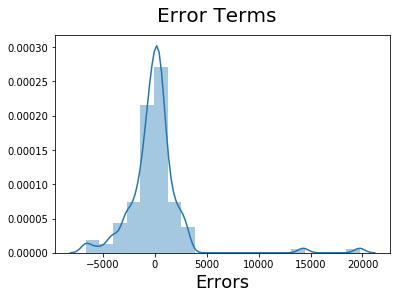

In [221]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [222]:
#5. Prediction and Evaluation

#selecting the highly correlated values
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [223]:
#splitting into x and y
y_test=df_test.pop('price')
x_test=df_test

In [224]:
# Now let's use our model to make predictions.
X_train_new = model_check.drop('const',axis=1)

In [225]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = x_test[X_train_new.columns]

In [226]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


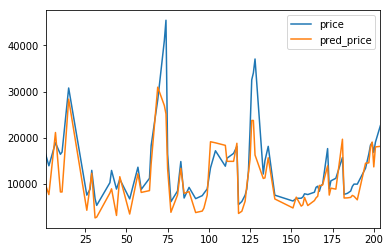

In [227]:
y_pred=lm.predict(X_test_new)
y_test
y_pred
price=pd.concat([y_test,y_pred],axis=1)
price=price.rename(columns={0:'pred_price'}) #price prediction using linear regression
price=price.sort_index()
price.plot()

In [228]:
from sklearn.metrics import r2_score 
acc=r2_score(y_test, y_pred)

In [229]:
print('The Accuracy Score is : ',(acc*100).round(3),'%') #Accuracy Score with Linear Regression

The Accuracy Score is :  64.377 %


In [230]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [231]:
rf_pred=pd.Series(rf.predict(x_test)) #price prediction using random forest 
rf_pred
acc_rf=r2_score(y_test, rf_pred)

In [232]:
print('The Accuracy Score is : ',(acc_rf*100).round(3),'%') #Accuracy Score with Random Forest Regressor

The Accuracy Score is :  76.147 %


Text(0, 0.5, 'Car Price')

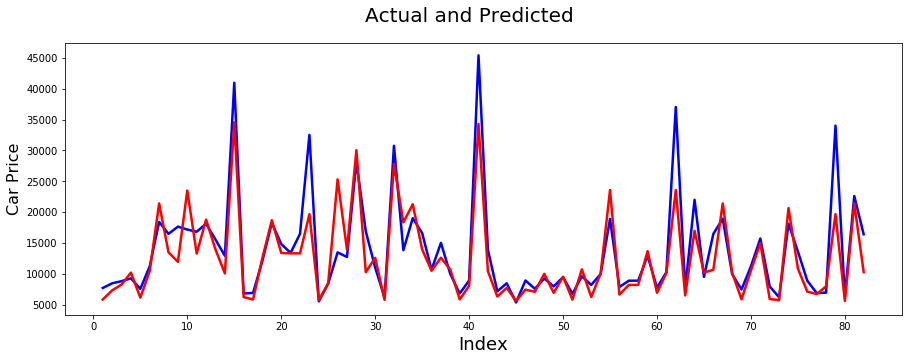

In [233]:
c= [i for i in range(1,83,1)] # generating index 
fig = plt.figure(figsize=(15,5)) 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,rf_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

Text(0, 0.5, 'y_pred')

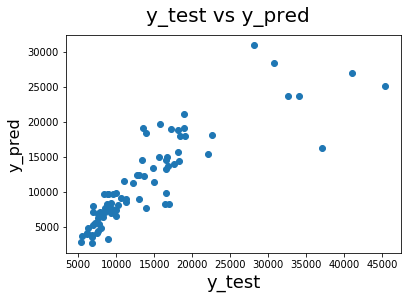

In [234]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'rf_pred')

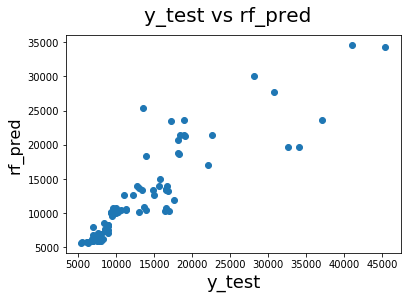

In [235]:
#plotting y_test and rf_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,rf_pred)
fig.suptitle('y_test vs rf_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('rf_pred', fontsize=16)                          # Y-label

In [ ]:
#Finally First Project Comes to an End :